# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
import random
random.seed(10)

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url + city).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']  
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kempsey
Processing Record 2 of Set 1 | walvis bay
Processing Record 3 of Set 1 | sitka
Processing Record 4 of Set 1 | pangody
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | isafjordur
Processing Record 7 of Set 1 | hawaiian paradise park
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | invercargill
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | qaqortoq
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | stanley
Processing Record 16 of Set 1 | ketchikan
Processing Record 17 of Set 1 | utrik
Processing Record 18 of Set 1 | lompoc
Processing Record 19 of Set 1 | kidal
Processing Record 20 of Set 1 | puerto baquerizo moreno
Processing Record 21 of Set 1 | ilulissat
Processing Record 22 of Set 1 | 'ohonua
City not

Processing Record 40 of Set 4 | dwarka
Processing Record 41 of Set 4 | magistral'nyy
Processing Record 42 of Set 4 | nova sintra
Processing Record 43 of Set 4 | puerto aysen
Processing Record 44 of Set 4 | manaure
Processing Record 45 of Set 4 | tiksi
Processing Record 46 of Set 4 | ancud
Processing Record 47 of Set 4 | bushehr
Processing Record 48 of Set 4 | turkmenbasy
Processing Record 49 of Set 4 | ostersund
Processing Record 0 of Set 5 | buerarema
Processing Record 1 of Set 5 | severo-yeniseyskiy
Processing Record 2 of Set 5 | khandyga
Processing Record 3 of Set 5 | el alto
Processing Record 4 of Set 5 | asosa
Processing Record 5 of Set 5 | selfoss
Processing Record 6 of Set 5 | vredendal
Processing Record 7 of Set 5 | ajdabiya
Processing Record 8 of Set 5 | afaahiti
Processing Record 9 of Set 5 | saksaul'skiy
City not found. Skipping...
Processing Record 10 of Set 5 | shahr-e babak
Processing Record 11 of Set 5 | agboville
Processing Record 12 of Set 5 | aasiaat
Processing Record

Processing Record 30 of Set 8 | abbeville
Processing Record 31 of Set 8 | alice springs
Processing Record 32 of Set 8 | lazaro cardenas
Processing Record 33 of Set 8 | kulia village
City not found. Skipping...
Processing Record 34 of Set 8 | kamakwie
Processing Record 35 of Set 8 | kataragama
City not found. Skipping...
Processing Record 36 of Set 8 | nurota
Processing Record 37 of Set 8 | zakynthos
Processing Record 38 of Set 8 | sultandagi
Processing Record 39 of Set 8 | arkhangel'sk
Processing Record 40 of Set 8 | mahebourg
Processing Record 41 of Set 8 | princeville
Processing Record 42 of Set 8 | ta`u
Processing Record 43 of Set 8 | sodo
Processing Record 44 of Set 8 | christchurch
Processing Record 45 of Set 8 | saudarkrokur
Processing Record 46 of Set 8 | lembar
City not found. Skipping...
Processing Record 47 of Set 8 | papao
Processing Record 48 of Set 8 | pleiku
Processing Record 49 of Set 8 | aktau
Processing Record 0 of Set 9 | la passe
Processing Record 1 of Set 9 | ingeni

City not found. Skipping...
Processing Record 19 of Set 12 | tralee
Processing Record 20 of Set 12 | kruisfontein
Processing Record 21 of Set 12 | amble
Processing Record 22 of Set 12 | mandan
Processing Record 23 of Set 12 | fonte boa
Processing Record 24 of Set 12 | rawai
Processing Record 25 of Set 12 | tailai
Processing Record 26 of Set 12 | novodvinsk
Processing Record 27 of Set 12 | pacific grove
Processing Record 28 of Set 12 | bayindir
Processing Record 29 of Set 12 | ubari
Processing Record 30 of Set 12 | chania
Processing Record 31 of Set 12 | leona vicario
Processing Record 32 of Set 12 | yaren
Processing Record 33 of Set 12 | bathsheba
Processing Record 34 of Set 12 | igrim
Processing Record 35 of Set 12 | kassala
Processing Record 36 of Set 12 | iquique
Processing Record 37 of Set 12 | thames
Processing Record 38 of Set 12 | hilo
Processing Record 39 of Set 12 | mananjary
Processing Record 40 of Set 12 | port saint john's
Processing Record 41 of Set 12 | stralsund
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kempsey,-31.0833,152.8333,6.08,87,13,1.34,AU,1686337471
1,walvis bay,-22.9575,14.5053,13.94,76,0,5.18,NA,1686337628
2,sitka,57.0531,-135.3300,11.94,87,100,0.00,US,1686337628
3,pangody,65.8500,74.4859,4.28,59,4,2.69,RU,1686337629
4,iqaluit,63.7506,-68.5145,4.83,75,100,2.24,CA,1686337629


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kempsey,-31.0833,152.8333,6.08,87,13,1.34,AU,1686337471
1,walvis bay,-22.9575,14.5053,13.94,76,0,5.18,NaN,1686337628
2,sitka,57.0531,-135.3300,11.94,87,100,0.00,US,1686337628
3,pangody,65.8500,74.4859,4.28,59,4,2.69,RU,1686337629
4,iqaluit,63.7506,-68.5145,4.83,75,100,2.24,CA,1686337629


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

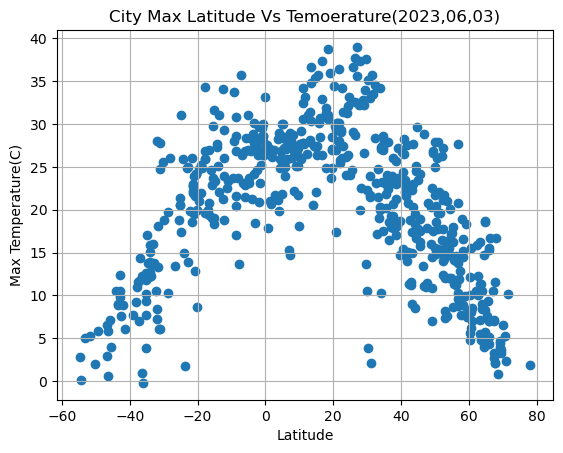

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
def scatter_plot(x_axis,y_axis,title,
                 xlabel,ylabel,figName):
    # Build the scatter plots 
    x = city_data_df[x_axis]
    y = city_data_df[y_axis]
    # Incorporate the other graph properties
    plt.scatter(x,y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    # Save the figure
    plt.savefig(figName)
    
    # Show plot
    plt.show()

scatter_plot ('Lat','Max Temp', 'City Max Latitude Vs Temoerature(2023,06,03)', 'Latitude','Max Temperature(C)','../output_data/Fig1.png')

#### Latitude Vs. Humidity

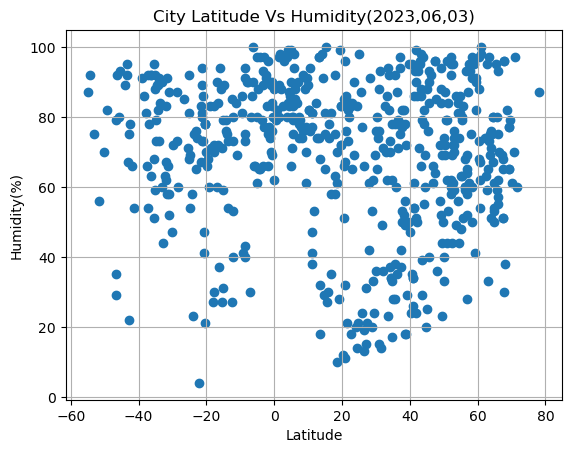

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
scatter_plot ('Lat','Humidity','City Latitude Vs Humidity(2023,06,03)','Latitude','Humidity(%)','../output_data/Fig2.png')

#### Latitude Vs. Cloudiness

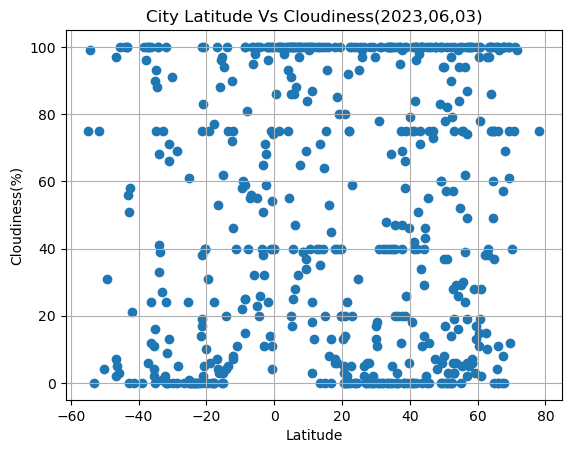

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
scatter_plot ('Lat','Cloudiness', 'City Latitude Vs Cloudiness(2023,06,03)', 'Latitude','Cloudiness(%)','../output_data/Fig3.png')


#### Latitude vs. Wind Speed Plot

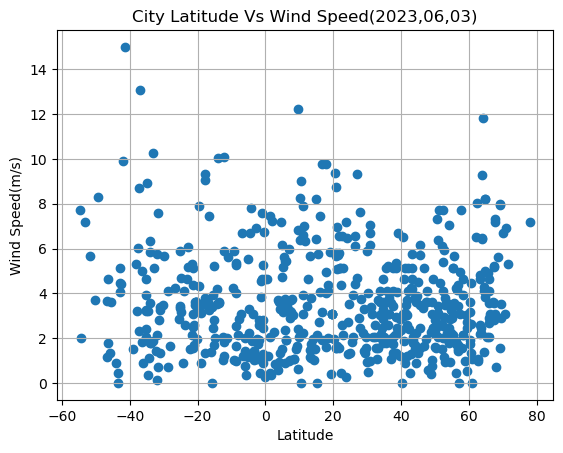

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
scatter_plot ('Lat','Wind Speed', 'City Latitude Vs Wind Speed(2023,06,03)', 'Latitude','Wind Speed(m/s)','../output_data/Fig4.png')

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def Lin_regress(df,x_value,y_value,xlabel,ylabel,a,b):
    x = df[x_value]
    y = df[y_value]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,sitka,57.0531,-135.3300,11.94,87,100,0.00,US,1686337628
3,pangody,65.8500,74.4859,4.28,59,4,2.69,RU,1686337629
4,iqaluit,63.7506,-68.5145,4.83,75,100,2.24,CA,1686337629
5,isafjordur,66.0755,-23.1240,7.02,93,75,4.12,IS,1686337629
6,hawaiian paradise park,19.5933,-154.9731,27.07,72,20,3.09,US,1686337630


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat']< 0,:]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kempsey,-31.0833,152.8333,6.08,87,13,1.34,AU,1686337471
1,walvis bay,-22.9575,14.5053,13.94,76,0,5.18,NaN,1686337628
8,invercargill,-46.4000,168.3500,0.62,92,5,1.77,NZ,1686337630
9,port-aux-francais,-49.3500,70.2167,5.89,82,31,8.31,TF,1686337630
10,puerto ayora,-0.7393,-90.3518,29.98,90,54,0.89,EC,1686337631


###  Temperature vs. Latitude Linear Regression Plot

y = -0.33x + 32.81
The r-value is: 0.5481802485598074


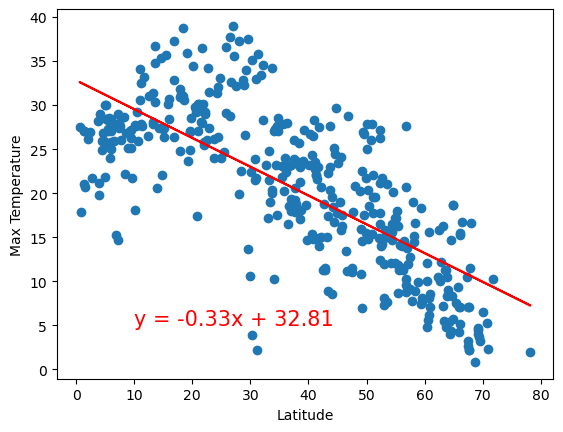

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
Lin_regress(northern_hemi_df,'Lat','Max Temp','Latitude','Max Temperature',10,5)

y = 0.49x + 29.86
The r-value is: 0.6689135700261475


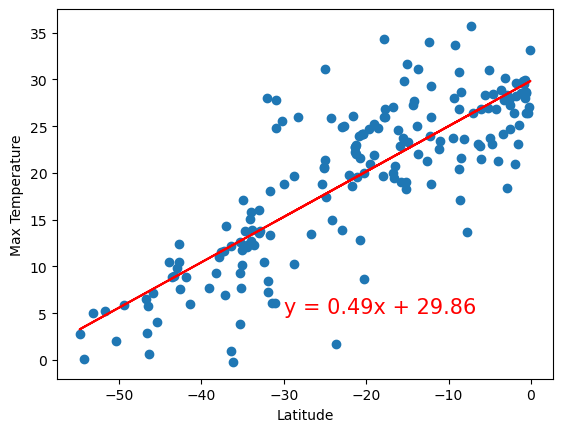

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
Lin_regress(southern_hemi_df,'Lat','Max Temp','Latitude','Max Temperature',-30,5)

**Discussion about the linear relationship:** 
The linear regression plot shows that in the northern hemisphere,as the latitude increases, the max temperature decreases i.e. as one moves away from the equator towards the northern hemishere, the maximum temperature decreases.In the southern hemishere, the max temperature increases with decrease in the latitude. This tells us that the temperature decreases as we move away from the equator towards the southern hemisphere. The latitudes near the equator have higher temperature. The r-value shows the strong correlation between the two variables(Latitude, Max Temp.)

### Humidity vs. Latitude Linear Regression Plot

y = -0.07x + 70.47
The r-value is: 0.0038155638371174423


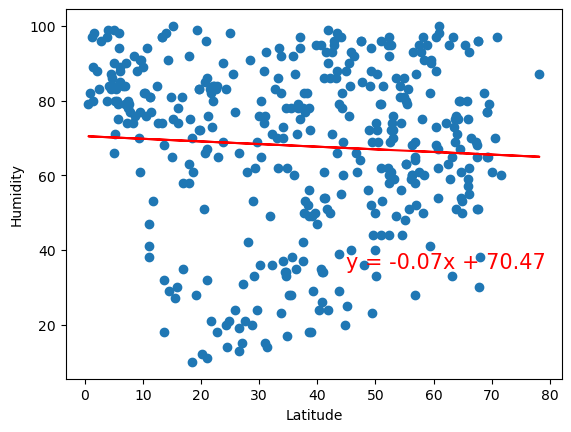

In [17]:
# Northern Hemisphere
# YOUR CODE HERE
Lin_regress(northern_hemi_df,'Lat','Humidity','Latitude','Humidity',45,35)

y = 0.07x + 73.95
The r-value is: 0.0026666960688520084


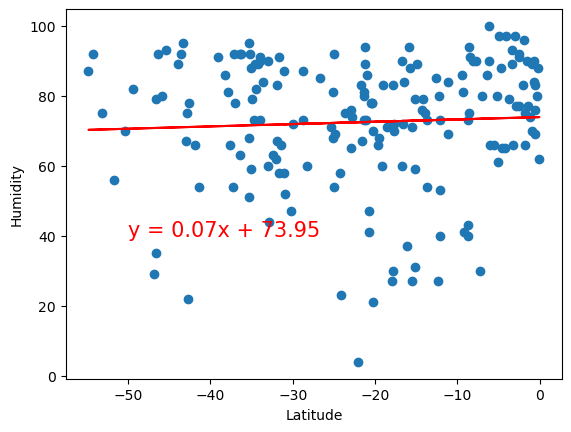

In [18]:
# Southern Hemisphere
# YOUR CODE HERE
Lin_regress(southern_hemi_df,'Lat','Humidity','Latitude','Humidity',-50,40)

**Discussion about the linear relationship:** 
Both for the northern and southern hemisphere, the r value is very low, it shows the weak correlation between humidity and the latitude. The plot doesn't show much change in Humidity with change in Latitude, the variance of the humidity with the latitude can not be predicted correctly.Most of the data points lie away from the line of best fit which indicates regression error.


### Cloudiness vs. Latitude Linear Regression Plot

y = -0.14x + 59.63
The r-value is: 0.004765761823150115


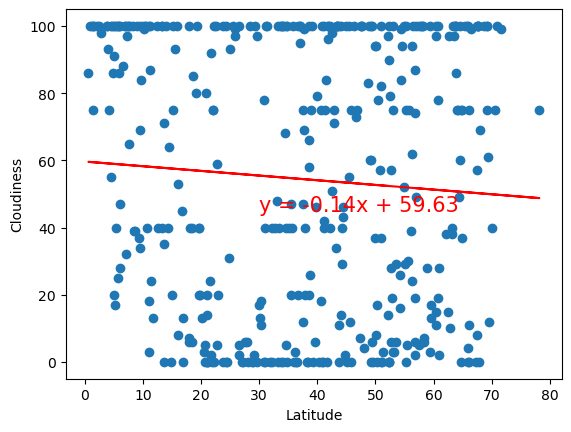

In [19]:
# Northern Hemisphere
# YOUR CODE HERE
Lin_regress(northern_hemi_df,'Lat','Cloudiness','Latitude','Cloudiness',30,45)

y = 0.29x + 50.58
The r-value is: 0.011898693729314454


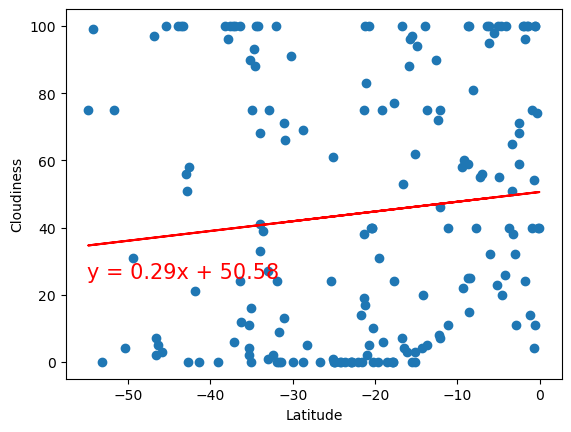

In [20]:
# Southern Hemisphere
# YOUR CODE HERE
Lin_regress(southern_hemi_df,'Lat','Cloudiness','Latitude','Cloudiness',-55,25)

**Discussion about the linear relationship:** 
It is difficut to predict a linear relation between the cloudiness and Latitude as the r valur for both the northern and sourthern hemisphere is low which shows the weak correlation between the two variables. Also most of the datapoints lie away from the line of best fit.

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.0x + 3.5
The r-value is: 8.614233755433358e-06


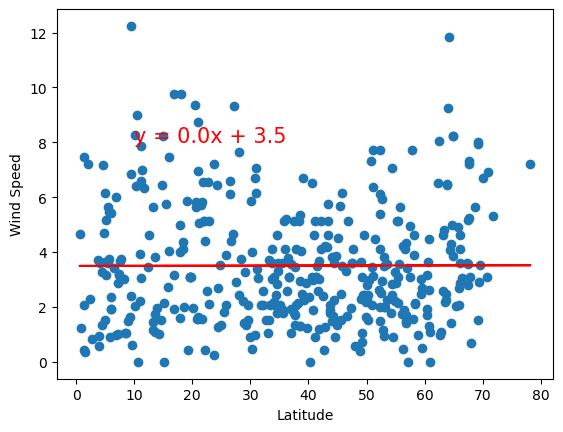

In [21]:
# Northern Hemisphere
# YOUR CODE HERE
Lin_regress(northern_hemi_df,'Lat','Wind Speed','Latitude','Wind Speed',10,8)

y = -0.03x + 3.0
The r-value is: 0.02835901664604208


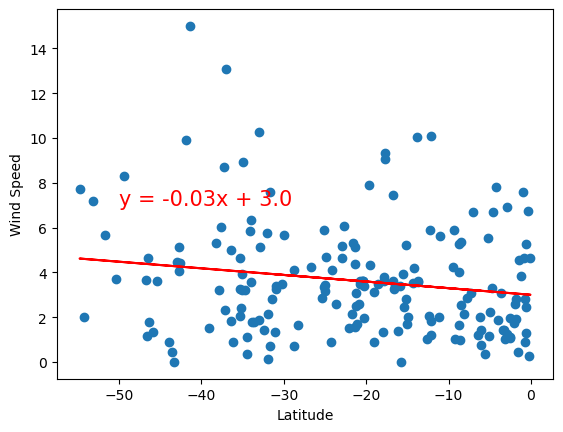

In [22]:
# Southern Hemisphere
# YOUR CODE HERE
Lin_regress(southern_hemi_df,'Lat','Wind Speed','Latitude','Wind Speed',-50,7)

**Discussion about the linear relationship:** 
In the northern hemisphere, the slope of the best fit line is zero. Although the data points lie near the line of best fit,it is difficult to predict a linear relation between the two variables since the r value is very small.
In the southern hemisphere, the line of best fit has a neagtive slope, showing that cloudiness increases as you one moves away from the equator. But the r value is low and many of the data points lie away from the best fit line showing the regression error. It is difficult to predict a correlation between the cloudiness and Latitude.